In [1]:
import requests
from bs4 import BeautifulSoup
from utils import *
import pandas as pd
import time
from time import sleep
import random
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import json
import os.path
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
# generate HTML files and dataframe 
from collector import *

We have generated tsv files by parsing html files using BeautifulSoup library. Then, the data from tsp files was processed to generate vocabulary. Vocabulary are stemmed and contains no stop words.

In [ ]:
# generate TSV files from HTML
from parser import *

In [ ]:
# generate all index files and vocabulary
from index import *

In [2]:
# import main with all we need for the search engine
from main import * 

## Task 2.1
Search 1: the search is made via inverted index which contains only set documents id by keyword id from vocabulary. Here, we applied set intersection to find all documents containing all terms of query.


In [14]:
search(1, 'world war', 5)

,Title,Intro,URL
0,Son of Lassie,"Son of Lassie (also known as Laddie, Son of Lassie) is a 1945 Technicolor feature film produced by MGM based on characters created by Eric Knight, and starring Peter Lawford, Donald Crisp, June Lockha ...",https://en.wikipedia.org/wiki/Traffic_(2000_film)
1,The Story of G.I. Joe,"The Story of G.I. Joe, also credited in prints as Ernie Pyle's Story of G.I. Joe, is a 1945 American war film directed by William Wellman, starring Burgess Meredith and Robert Mitchum. The film was no ...",https://en.wikipedia.org/wiki/The_Passionate_Plumber
2,The Call of the Wild (1908 film),"The Call of the Wild is a 1908 American short adventure film directed by D.W. Griffith. It starred Charles Inslee, Harry Solter and Florence Lawrence. The film was made by the American Mutoscope and B ...",https://en.wikipedia.org/wiki/Brainstorm_(1983_film)
3,Target-Invisible,Target-Invisible is a 1945 documentary short film produced by the First Motion Picture Unit after World War II. The film depicts the uses of radar in aerial direction-finding and precision high-level ...,https://en.wikipedia.org/wiki/What_Planet_Are_You_From%3F
4,They Were Expendable,"They Were Expendable is a 1945 American war film directed by John Ford and starring Robert Montgomery and John Wayne and featuring Donna Reed. The film is based on the 1942 book by William L. White, ...",https://en.wikipedia.org/wiki/Payment_Deferred_(film)


## Task 2.2
Search 2: the search is made via inverted index with tfidf for each word-document pair. Here, we find all documents containg all words of query via 'filter_documents' function which, abstracly speaking, moves pointers for each list of documents until the same document id is found for each list. After that, we apply cosine similarity for vectors of documents tfidf and query tfidf vector (we don't divide on query norm thus score can be greater then 1). 

In [13]:
search(2, 'star space', 5)

,Score,Title,Intro,URL
0,0.32,Space Master X-7,"Space Master X-7 is a 1958 American black-and-white science fiction film in widescreen Regalscope from Regal Pictures, produced by Bernard Glasser, directed by Edward Bernds, that stars Bill Williams, ...",https://en.wikipedia.org/wiki/Bullet_to_the_Head
1,0.28,Space Ship Sappy,"Space Ship Sappy is 1957 film directed by Jules White and starring American slapstick comedy team The Three Stooges (Moe Howard, Larry Fine and Joe Besser). It is the 178th short film released by Colu ...",https://en.wikipedia.org/wiki/Dragon_Eyes
2,0.24,Outer Space Jitters,"Outer Space Jitters is the 182nd short film released by Columbia Pictures in 1957 starring American slapstick comedy team The Three Stooges (Moe Howard, Larry Fine, and Joe Besser). The comedians rele ...",https://en.wikipedia.org/wiki/Chernobyl_Diaries
3,0.21,Chosen Survivors,Chosen Survivors is a 1974 Mexican-American science fiction/horror film directed by Sutton Roley and starring Alex Cord and Jackie Cooper. ...,https://en.wikipedia.org/wiki/Jack%27s_the_Boy
4,0.21,The Astro-Zombies,"The Astro-Zombies is a 1968 American science fiction horror film starring John Carradine, Wendell Corey (in his final film appearance) and Tura Satana. It was written, directed and produced by Ted V. ...",https://en.wikipedia.org/wiki/Lonely_Hearts_(1982_film)


## Task 3

        We have created additional inverted index for movie names in order to get the first results of search engine with movies containing query terms in their names. In this case, we compute cosine similarity for all documents with at least one query term, thus we have vectors or documents with zero components.

     
       Then we ask the user to insert an additional parameter (year or language) to calculate a new score and have a new ranking based on the distance from the requested year or based on the language entered


In [ ]:
search(3, 'movie', 3)

# BONUS PART

/Users/adm-vp/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


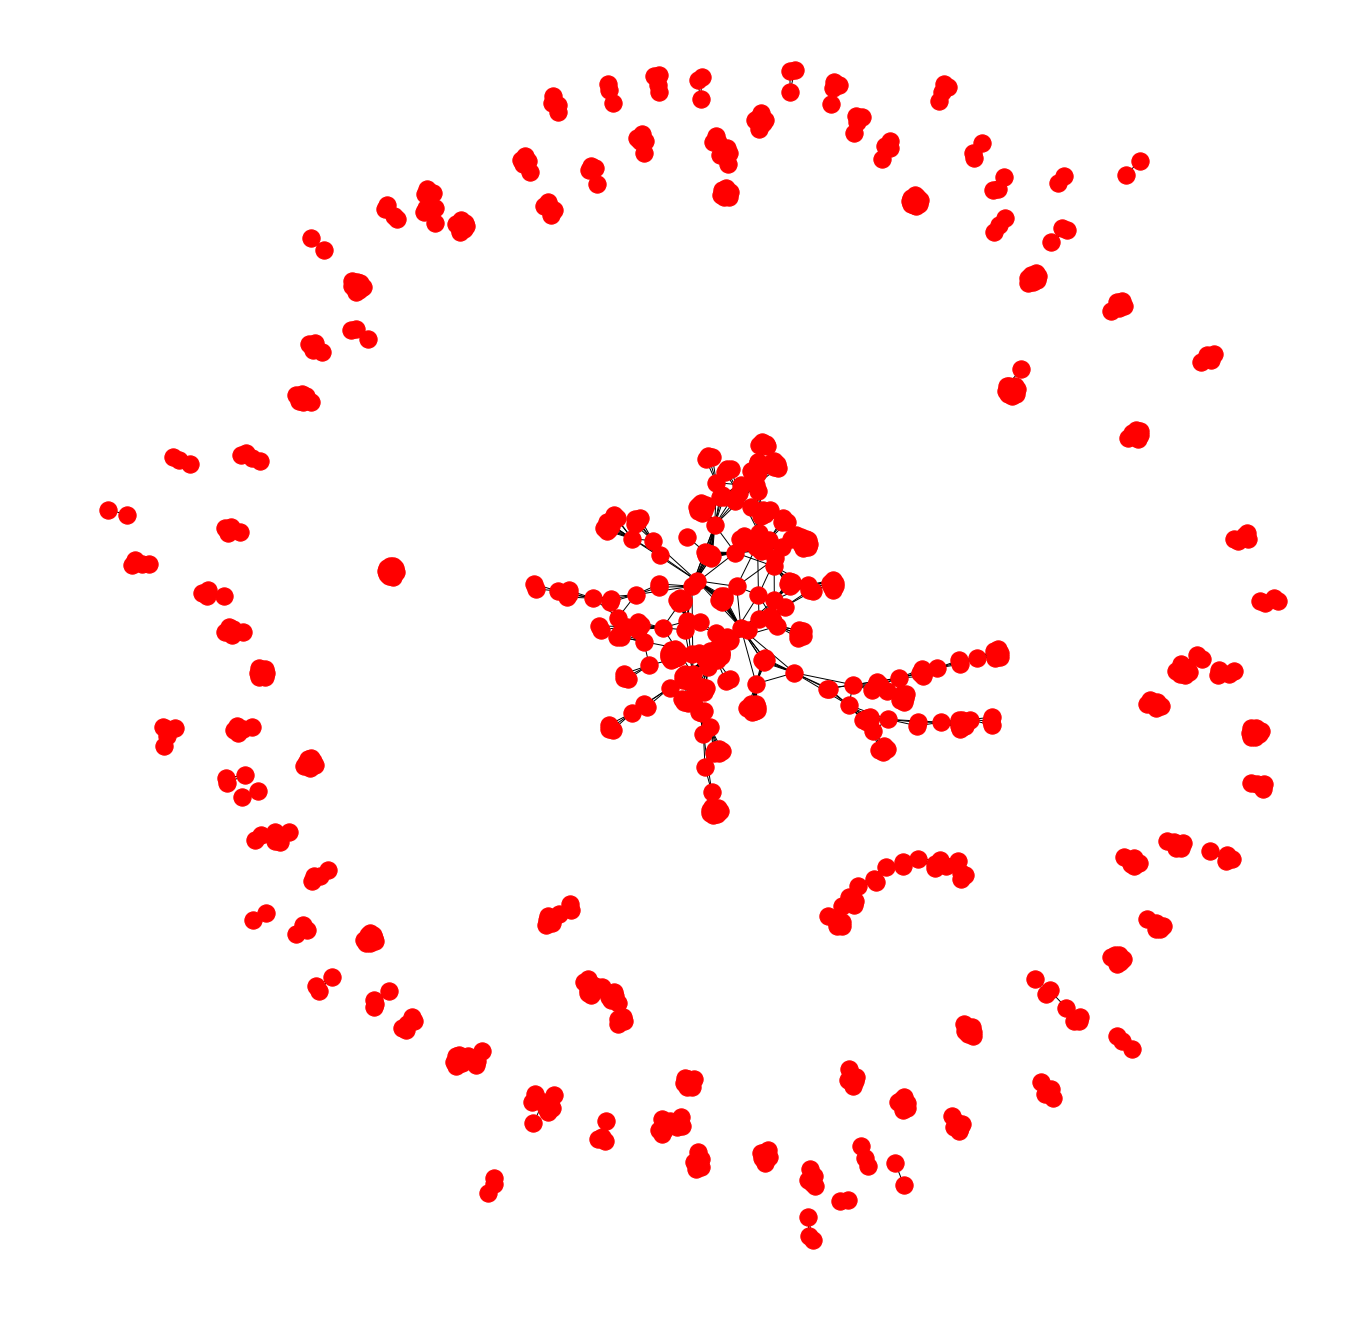

In [10]:
G = nx.Graph()

query = '1980'
search_result = search_with_tfidf(query, vocabulary, inverted_index_2, doc_norm)
for score, doc_id in search_result:
    file_name = f'tsv/{doc_id}.tsv'
    starring = data_from_tsv(file_name, [7]).split()
    actors = [t[0] +' '+ t[1] for t in zip(starring[0::2], starring[1::2])]
    G.add_edges_from(combinations(actors, 2))


plt.figure(figsize=(18, 18))
nx.draw(G)
